# PARTE 30: VALIDACIÓN DE MODELO LOGÍSTICO

* Paso 1: Dividir el DATASET en entrenamiento y prueba (generalmente 80% - 20%)
* Paso 2: Implementar el modelo que tuvo buenos indicadores con solo el DATASET de entrenamiento
* Paso 3: Verificar que aún tenga buenos indicadores
* Paso 4: Aplicar el modelo sobre el DATASET de pruebas
* Paso 5: Verificar que aún tenga buenos indicadores

## PARTE 30.1: VALIDAR MODELO DE FORMA HABITUAL

In [1]:
#IMPORTAR DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)

#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#### VERIFICACIÓN QUE TIENE BUENOS INDICADORES SOBRE DATASET TOTAL

Optimization terminated successfully.
         Current function value: 0.533480
         Iterations 6
PRECISION--> 0.6358208955223881
EXACTITUD--> 0.76953125
SENSIBILIDAD--> 0.7947761194029851
ESPECIFICIDAD--> 0.756
ÁREA / RENDIMIENTO --> 0.837186567164179


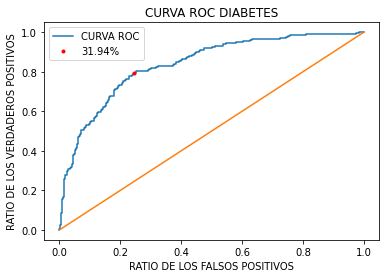

In [2]:
#-----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = ['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_Y = DATASET[VY].copy()
DATASET_X = DATASET[VX].copy()

#-----------------------------------------------------------------------------
#NORMALIZACIÓN DEL DATASET PREDICTOR
from sklearn.preprocessing import StandardScaler

NORMALIZAR = StandardScaler()
CABECERAS = DATASET_X.columns.tolist()
DATASET_X = NORMALIZAR.fit_transform(DATASET_X)
DATASET_X = pd.DataFrame(DATASET_X ,columns = CABECERAS)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO SKLEARN
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN = LogisticRegression()
MODELO_SKLEARN.fit(DATASET_X, DATASET_Y)

#SALIDA DEL MODELO
#[CERTEZA DEL VALOR][PROBABILIDAD]
PROBABILIDAD = MODELO_SKLEARN.predict_proba(DATASET_X)

#ESCOGIENDO EL LÍMITE PARA ANALIZAR PROBABILIDAD
#PROBABILIDAD < LÍMITE --> 0
#PROBABILIDAD >= LÍMITE --> 1
PROBABILIDAD = PROBABILIDAD[:,1]
LIMITE = 0.3194

import numpy as np
DATASET["PRED"] = np.where(PROBABILIDAD>LIMITE , 1 , 0)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO STATSMODELS
import statsmodels.api as sa
MODELO_STATS = sa.Logit(DATASET_Y , DATASET_X).fit()

#CÁLCULO DE PVALUES
for INDICE,VALOR in enumerate(MODELO_STATS.pvalues):
    if VALOR > 0.05:
        print("----PVALUES CRÍTICOS----")
        print("{} --> {}".format(MODELO_STATS.pvalues.index[INDICE],VALOR))
        
#-----------------------------------------------------------------------------
#GENERACIÓN DE MATRIZ DE CONFUSIÓN
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#VALORES DE LA MATRIZ DE CONFUSIÓN
#[VN][FP]
#[FN][VP]

MATRIZ_CONFUSION_2 = confusion_matrix(y_true = DATASET[VY] , y_pred = DATASET["PRED"] )
#[FILAS][COLUMNAS]
VN = MATRIZ_CONFUSION_2[0][0]
VP = MATRIZ_CONFUSION_2[1][1]
FN = MATRIZ_CONFUSION_2[1][0]
FP = MATRIZ_CONFUSION_2[0][1]

#--------------------------------------------------------------------------------------
#PRECISIÓN
#El porcentaje de casos predichos correctamente como positivos del total de casos predichos como positivo
PRECISION = VP / (VP + FP)
print("PRECISION-->",PRECISION)

#EXACTITUD
#El porcentaje de casos predichos correctamente del total de casos
EXACTITUD = (VP + VN)/ (VP + FP + VN + FN)
print("EXACTITUD-->",EXACTITUD)

#SENSIBILIDAD ---> CAPACIDAD PARA DETECTAR POSITIVOS
#El porcentaje de casos predichos correctamente como positivos del total de casos que son positivos
SENSIBILIDAD = (VP)/ (VP + FN)
print("SENSIBILIDAD-->",SENSIBILIDAD)

#ESPECIFICIDAD ---> CAPACIDAD PARA DETECTAR NEGATIVOS
#El porcentaje de casos predichos correctamente como negativos del total de casos que son negativos
ESPECIFICIDAD = (VN)/ (VN + FP)
print("ESPECIFICIDAD-->",ESPECIFICIDAD)

#-----------------------------------------------------------------------------
#CÁLCULO DE LAS PROBABILIDADES
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN = LogisticRegression()
MODELO_SKLEARN.fit(DATASET_X, DATASET_Y)
PROBABILIDAD = MODELO_SKLEARN.predict_proba(DATASET_X)
PROBABILIDAD = PROBABILIDAD[:,1]

#-----------------------------------------------------------------------------
#CÁLCULO DEL ÁREA DEBAJO DE LA CURVA ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AREA = roc_auc_score(DATASET_Y,PROBABILIDAD)
print("ÁREA / RENDIMIENTO -->",AREA)

#GENERACIÓN DE LA CURVA ROC
import matplotlib.pyplot as plt
EJEX, EJEY, LIMITE = roc_curve(DATASET_Y,PROBABILIDAD)

#GENERACIÓN DE INFORMACIÓN ADICIONAL
DATASET_ROC = pd.DataFrame({
    "X":EJEX,
    "Y":EJEY,
    "L":LIMITE
})

DATASET_ROC["D"] = (DATASET_ROC["X"]**2 + (1-DATASET_ROC["Y"])**2)**(1/2)

#-----------------------------------------------------------------------------
#GRÁFICO DE LA CURVA ROC
import numpy as np
CX = DATASET_ROC[DATASET_ROC["D"] == np.min(DATASET_ROC["D"])]["X"]
CY = DATASET_ROC[DATASET_ROC["D"] == np.min(DATASET_ROC["D"])]["Y"]
LIMITE_OPTIMO = round(DATASET_ROC[DATASET_ROC["D"] == np.min(DATASET_ROC["D"])]["L"],4)
ETIQUETA = str(float(LIMITE_OPTIMO*100)) + "%"

plt.plot(EJEX,EJEY, label = "CURVA ROC")
plt.plot([0,1],[0,1])
plt.plot(CX,CY,"r.", label = ETIQUETA)
plt.title("CURVA ROC DIABETES")
plt.xlabel("RATIO DE LOS FALSOS POSITIVOS")
plt.ylabel("RATIO DE LOS VERDADEROS POSITIVOS")
plt.legend()
plt.show()

#### VERIFICACIÓN QUE TIENE BUENOS INDICADORES SOBRE DATASET ENTRENAMIENTO

Optimization terminated successfully.
         Current function value: 0.514014
         Iterations 6
PRECISION--> 0.6616541353383458
EXACTITUD--> 0.7882736156351792
SENSIBILIDAD--> 0.8148148148148148
ESPECIFICIDAD--> 0.7738693467336684
ÁREA / RENDIMIENTO --> 0.8545505304299275


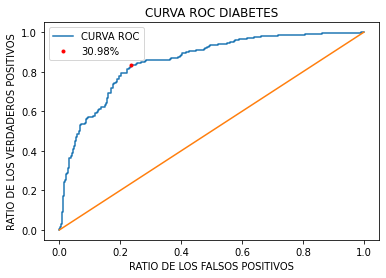

In [3]:
#-----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = ['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']

#GENERACIÓN DE DATASET_ENTRENAMIENTO PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

#-----------------------------------------------------------------------------
#NORMALIZACIÓN DEL DATASET_ENTRENAMIENTO PREDICTOR
from sklearn.preprocessing import StandardScaler

NORMALIZAR = StandardScaler()
CABECERAS = DATASET_ENTRENAMIENTO_X.columns.tolist()
DATASET_ENTRENAMIENTO_X = NORMALIZAR.fit_transform(DATASET_ENTRENAMIENTO_X)
DATASET_ENTRENAMIENTO_X = pd.DataFrame(DATASET_ENTRENAMIENTO_X ,columns = CABECERAS)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO SKLEARN
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN_E = LogisticRegression()
MODELO_SKLEARN_E.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)

#SALIDA DEL MODELO
#[CERTEZA DEL VALOR][PROBABILIDAD]
PROBABILIDAD = MODELO_SKLEARN_E.predict_proba(DATASET_ENTRENAMIENTO_X)

#ESCOGIENDO EL LÍMITE PARA ANALIZAR PROBABILIDAD
#PROBABILIDAD < LÍMITE --> 0
#PROBABILIDAD >= LÍMITE --> 1
PROBABILIDAD = PROBABILIDAD[:,1]
LIMITE = 0.3194

import numpy as np
DATASET_ENTRENAMIENTO["PRED"] = np.where(PROBABILIDAD>LIMITE , 1 , 0)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO STATSMODELS
import statsmodels.api as sa
MODELO_STATS_E = sa.Logit(DATASET_ENTRENAMIENTO_Y , DATASET_ENTRENAMIENTO_X).fit()

#CÁLCULO DE PVALUES
for INDICE,VALOR in enumerate(MODELO_STATS_E.pvalues):
    if VALOR > 0.05:
        print("----PVALUES CRÍTICOS----")
        print("{} --> {}".format(MODELO_STATS_E.pvalues.index[INDICE],VALOR))
        
#-----------------------------------------------------------------------------
#GENERACIÓN DE MATRIZ DE CONFUSIÓN
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#VALORES DE LA MATRIZ DE CONFUSIÓN
#[VN][FP]
#[FN][VP]

MATRIZ_CONFUSION_2 = confusion_matrix(y_true = DATASET_ENTRENAMIENTO[VY] , y_pred = DATASET_ENTRENAMIENTO["PRED"] )
#[FILAS][COLUMNAS]
VN = MATRIZ_CONFUSION_2[0][0]
VP = MATRIZ_CONFUSION_2[1][1]
FN = MATRIZ_CONFUSION_2[1][0]
FP = MATRIZ_CONFUSION_2[0][1]

#--------------------------------------------------------------------------------------
#PRECISIÓN
#El porcentaje de casos predichos correctamente como positivos del total de casos predichos como positivo
PRECISION = VP / (VP + FP)
print("PRECISION-->",PRECISION)

#EXACTITUD
#El porcentaje de casos predichos correctamente del total de casos
EXACTITUD = (VP + VN)/ (VP + FP + VN + FN)
print("EXACTITUD-->",EXACTITUD)

#SENSIBILIDAD ---> CAPACIDAD PARA DETECTAR POSITIVOS
#El porcentaje de casos predichos correctamente como positivos del total de casos que son positivos
SENSIBILIDAD = (VP)/ (VP + FN)
print("SENSIBILIDAD-->",SENSIBILIDAD)

#ESPECIFICIDAD ---> CAPACIDAD PARA DETECTAR NEGATIVOS
#El porcentaje de casos predichos correctamente como negativos del total de casos que son negativos
ESPECIFICIDAD = (VN)/ (VN + FP)
print("ESPECIFICIDAD-->",ESPECIFICIDAD)

#-----------------------------------------------------------------------------
#CÁLCULO DE LAS PROBABILIDADES
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN_E = LogisticRegression()
MODELO_SKLEARN_E.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)
PROBABILIDAD = MODELO_SKLEARN_E.predict_proba(DATASET_ENTRENAMIENTO_X)
PROBABILIDAD = PROBABILIDAD[:,1]

#-----------------------------------------------------------------------------
#CÁLCULO DEL ÁREA DEBAJO DE LA CURVA ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AREA = roc_auc_score(DATASET_ENTRENAMIENTO_Y,PROBABILIDAD)
print("ÁREA / RENDIMIENTO -->",AREA)

#GENERACIÓN DE LA CURVA ROC
import matplotlib.pyplot as plt
EJEX, EJEY, LIMITE = roc_curve(DATASET_ENTRENAMIENTO_Y,PROBABILIDAD)

#GENERACIÓN DE INFORMACIÓN ADICIONAL
DATASET_ENTRENAMIENTO_ROC = pd.DataFrame({
    "X":EJEX,
    "Y":EJEY,
    "L":LIMITE
})

DATASET_ENTRENAMIENTO_ROC["D"] = (DATASET_ENTRENAMIENTO_ROC["X"]**2 + (1-DATASET_ENTRENAMIENTO_ROC["Y"])**2)**(1/2)

#-----------------------------------------------------------------------------
#GRÁFICO DE LA CURVA ROC
import numpy as np
CX = DATASET_ENTRENAMIENTO_ROC[DATASET_ENTRENAMIENTO_ROC["D"] == np.min(DATASET_ENTRENAMIENTO_ROC["D"])]["X"]
CY = DATASET_ENTRENAMIENTO_ROC[DATASET_ENTRENAMIENTO_ROC["D"] == np.min(DATASET_ENTRENAMIENTO_ROC["D"])]["Y"]
LIMITE_OPTIMO = round(DATASET_ENTRENAMIENTO_ROC[DATASET_ENTRENAMIENTO_ROC["D"] == np.min(DATASET_ENTRENAMIENTO_ROC["D"])]["L"],4)
ETIQUETA = str(float(LIMITE_OPTIMO*100)) + "%"

plt.plot(EJEX,EJEY, label = "CURVA ROC")
plt.plot([0,1],[0,1])
plt.plot(CX,CY,"r.", label = ETIQUETA)
plt.title("CURVA ROC DIABETES")
plt.xlabel("RATIO DE LOS FALSOS POSITIVOS")
plt.ylabel("RATIO DE LOS VERDADEROS POSITIVOS")
plt.legend()
plt.show()

#### VERIFICACIÓN QUE TIENE BUENOS INDICADORES SOBRE DATASET PRUEBAS

PRECISION--> 0.5217391304347826
EXACTITUD--> 0.6818181818181818
SENSIBILIDAD--> 0.6923076923076923
ESPECIFICIDAD--> 0.6764705882352942
ÁREA / RENDIMIENTO --> 0.8075037707390649


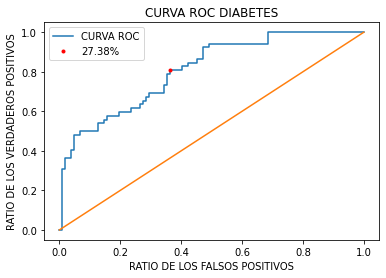

In [4]:
#-----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = ['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']

#GENERACIÓN DE DATASET_PRUEBAS PREDICHO Y PREDICTOR
DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#-----------------------------------------------------------------------------
#NORMALIZACIÓN DEL DATASET_PRUEBAS PREDICTOR
from sklearn.preprocessing import StandardScaler

NORMALIZAR = StandardScaler()
CABECERAS = DATASET_PRUEBAS_X.columns.tolist()
DATASET_PRUEBAS_X = NORMALIZAR.fit_transform(DATASET_PRUEBAS_X)
DATASET_PRUEBAS_X = pd.DataFrame(DATASET_PRUEBAS_X ,columns = CABECERAS)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO SKLEARN
from sklearn.linear_model import LogisticRegression

#SALIDA DEL MODELO
#[CERTEZA DEL VALOR][PROBABILIDAD]
PROBABILIDAD = MODELO_SKLEARN_E.predict_proba(DATASET_PRUEBAS_X)

#ESCOGIENDO EL LÍMITE PARA ANALIZAR PROBABILIDAD
#PROBABILIDAD < LÍMITE --> 0
#PROBABILIDAD >= LÍMITE --> 1
PROBABILIDAD = PROBABILIDAD[:,1]
LIMITE = 0.3194

import numpy as np
DATASET_PRUEBAS["PRED"] = np.where(PROBABILIDAD>LIMITE , 1 , 0)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO STATSMODELS
import statsmodels.api as sa

#CÁLCULO DE PVALUES
for INDICE,VALOR in enumerate(MODELO_STATS_E.pvalues):
    if VALOR > 0.05:
        print("----PVALUES CRÍTICOS----")
        print("{} --> {}".format(MODELO_STATS_E.pvalues.index[INDICE],VALOR))
        
#-----------------------------------------------------------------------------
#GENERACIÓN DE MATRIZ DE CONFUSIÓN
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#VALORES DE LA MATRIZ DE CONFUSIÓN
#[VN][FP]
#[FN][VP]

MATRIZ_CONFUSION_2 = confusion_matrix(y_true = DATASET_PRUEBAS[VY] , y_pred = DATASET_PRUEBAS["PRED"] )
#[FILAS][COLUMNAS]
VN = MATRIZ_CONFUSION_2[0][0]
VP = MATRIZ_CONFUSION_2[1][1]
FN = MATRIZ_CONFUSION_2[1][0]
FP = MATRIZ_CONFUSION_2[0][1]

#--------------------------------------------------------------------------------------
#PRECISIÓN
#El porcentaje de casos predichos correctamente como positivos del total de casos predichos como positivo
PRECISION = VP / (VP + FP)
print("PRECISION-->",PRECISION)

#EXACTITUD
#El porcentaje de casos predichos correctamente del total de casos
EXACTITUD = (VP + VN)/ (VP + FP + VN + FN)
print("EXACTITUD-->",EXACTITUD)

#SENSIBILIDAD ---> CAPACIDAD PARA DETECTAR POSITIVOS
#El porcentaje de casos predichos correctamente como positivos del total de casos que son positivos
SENSIBILIDAD = (VP)/ (VP + FN)
print("SENSIBILIDAD-->",SENSIBILIDAD)

#ESPECIFICIDAD ---> CAPACIDAD PARA DETECTAR NEGATIVOS
#El porcentaje de casos predichos correctamente como negativos del total de casos que son negativos
ESPECIFICIDAD = (VN)/ (VN + FP)
print("ESPECIFICIDAD-->",ESPECIFICIDAD)

#-----------------------------------------------------------------------------
#CÁLCULO DE LAS PROBABILIDADES
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN_E = LogisticRegression()
MODELO_SKLEARN_E.fit(DATASET_PRUEBAS_X, DATASET_PRUEBAS_Y)
PROBABILIDAD = MODELO_SKLEARN_E.predict_proba(DATASET_PRUEBAS_X)
PROBABILIDAD = PROBABILIDAD[:,1]

#-----------------------------------------------------------------------------
#CÁLCULO DEL ÁREA DEBAJO DE LA CURVA ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AREA = roc_auc_score(DATASET_PRUEBAS_Y,PROBABILIDAD)
print("ÁREA / RENDIMIENTO -->",AREA)

#GENERACIÓN DE LA CURVA ROC
import matplotlib.pyplot as plt
EJEX, EJEY, LIMITE = roc_curve(DATASET_PRUEBAS_Y,PROBABILIDAD)

#GENERACIÓN DE INFORMACIÓN ADICIONAL
DATASET_PRUEBAS_ROC = pd.DataFrame({
    "X":EJEX,
    "Y":EJEY,
    "L":LIMITE
})

DATASET_PRUEBAS_ROC["D"] = (DATASET_PRUEBAS_ROC["X"]**2 + (1-DATASET_PRUEBAS_ROC["Y"])**2)**(1/2)

#-----------------------------------------------------------------------------
#GRÁFICO DE LA CURVA ROC
import numpy as np
CX = DATASET_PRUEBAS_ROC[DATASET_PRUEBAS_ROC["D"] == np.min(DATASET_PRUEBAS_ROC["D"])]["X"]
CY = DATASET_PRUEBAS_ROC[DATASET_PRUEBAS_ROC["D"] == np.min(DATASET_PRUEBAS_ROC["D"])]["Y"]
LIMITE_OPTIMO = round(DATASET_PRUEBAS_ROC[DATASET_PRUEBAS_ROC["D"] == np.min(DATASET_PRUEBAS_ROC["D"])]["L"],4)
ETIQUETA = str(float(LIMITE_OPTIMO*100)) + "%"

plt.plot(EJEX,EJEY, label = "CURVA ROC")
plt.plot([0,1],[0,1])
plt.plot(CX,CY,"r.", label = ETIQUETA)
plt.title("CURVA ROC DIABETES")
plt.xlabel("RATIO DE LOS FALSOS POSITIVOS")
plt.ylabel("RATIO DE LOS VERDADEROS POSITIVOS")
plt.legend()
plt.show()

In [10]:
# INDICADORES SOBRE DATASET TOTAL
PRECISION--> 0.6358208955223881
EXACTITUD--> 0.76953125
SENSIBILIDAD--> 0.7947761194029851
ESPECIFICIDAD--> 0.756
ÁREA / RENDIMIENTO --> 0.837186567164179

# INDICADORES SOBRE DATASET ENTRENAMIENTO
PRECISION--> 0.6616541353383458
EXACTITUD--> 0.7882736156351792
SENSIBILIDAD--> 0.8148148148148148
ESPECIFICIDAD--> 0.7738693467336684
ÁREA / RENDIMIENTO --> 0.8545505304299275

# INDICADORES SOBRE DATASET PRUEBAS
PRECISION--> 0.5217391304347826
EXACTITUD--> 0.6818181818181818
SENSIBILIDAD--> 0.6923076923076923
ESPECIFICIDAD--> 0.6764705882352942
ÁREA / RENDIMIENTO --> 0.8075037707390649

## PARTE 30.2: CROSS VALIDATION - VALIDACIÓN CRUZADA

### https://scikit-learn.org/stable/modules/model_evaluation.html

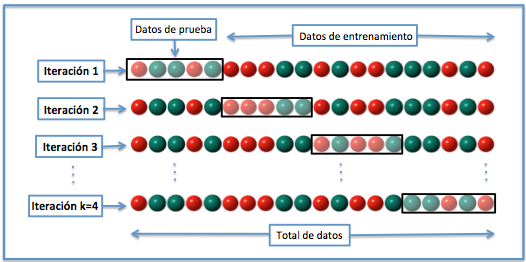

In [11]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/KFOLD_CROSS_VALIDATION.jpg")

In [5]:
#-----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)

#-----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = ['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_Y = DATASET[VY].copy()
DATASET_X = DATASET[VX].copy()

#-----------------------------------------------------------------------------
#NORMALIZACIÓN DEL DATASET PREDICTOR
from sklearn.preprocessing import StandardScaler

NORMALIZAR = StandardScaler()
CABECERAS = DATASET_X.columns.tolist()
DATASET_X = NORMALIZAR.fit_transform(DATASET_X)
DATASET_X = pd.DataFrame(DATASET_X ,columns = CABECERAS)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO SKLEARN
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN = LogisticRegression()
MODELO_SKLEARN.fit(DATASET_X, DATASET_Y)

LogisticRegression()

In [8]:
#CALCULAR INDICADORES MEDIANTE EL CROSS VALIDATION
#accuracy
from sklearn.model_selection import cross_val_score
SCORE_ACCURACY = cross_val_score(MODELO_SKLEARN,DATASET_X,DATASET_Y,scoring = "accuracy" , cv = 5)
SCORE_ACCURACY.mean()

0.7708683473389355

In [9]:
#CALCULAR INDICADORES MEDIANTE EL CROSS VALIDATION
#precision
from sklearn.model_selection import cross_val_score
SCORE_PRECISSION = cross_val_score(MODELO_SKLEARN,DATASET_X,DATASET_Y,scoring = "precision" , cv = 5)
SCORE_PRECISSION.mean()

0.7179300445346957

In [10]:
#CALCULAR INDICADORES MEDIANTE EL CROSS VALIDATION
#recall
from sklearn.model_selection import cross_val_score
SCORE_SENSIBILITY = cross_val_score(MODELO_SKLEARN,DATASET_X,DATASET_Y,scoring = "recall" , cv = 5)
SCORE_SENSIBILITY.mean()

0.5708595387840671

In [11]:
#CALCULAR INDICADORES MEDIANTE EL CROSS VALIDATION
#roc_auc
from sklearn.model_selection import cross_val_score
SCORE_ROC_AUC = cross_val_score(MODELO_SKLEARN,DATASET_X,DATASET_Y,scoring = "roc_auc" , cv = 5)
SCORE_ROC_AUC.mean()

0.8339881201956674